# Project 1 : Fundamentals of AIML - Cardio Good Fitness

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 10/21/2021
---


## Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products
Perform univariate and multivariate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

1. Product - The model no. of the treadmill
2. Age -  Age of the customer in no of years
3. Gender - Gender of the customer
4. Education - Education of the customer in no. of years
5. Marital Status - Marital status of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Income of the customer
9. Miles- Miles that a customer expects to run

---

In [1]:
#Import the required libraries at the beginning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### Understanding the structure of the data
- Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [2]:
#Read data from csv file using pandas and create DataFrame object
cardio_data =pd.read_csv("CardioGoodFitness.csv")

In [3]:
#Check shape of dataframe to know number of columns and rows
cardio_data.shape

(180, 9)

#### Observation : 
1. There are 180 rows and 9 columns in data

In [4]:
#Check datatypes of each columns
cardio_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### Observation : 
1. Column names and its data types are listed
2. Three columns "Product", "Gender" and "Marital Status" seems to be a object/string datatype
3. Six columns "Age", "Education", "Usage", "Fitness", "Income" and "Miles" are integer datatypes

In [5]:
#Additional check on data for datatypes
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observation : 
1. Row index is from 0 to 179. Total rows is 180
2. Column index is from 0 to 8. Total columns is 9
3. There are no null values in data

In [6]:
#Check statistical summary
cardio_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,"53,719.58",103.19
std,6.94,1.62,1.08,0.96,"16,506.68",51.86
min,18.00,12.00,2.00,1.00,"29,562.00",21.00
25%,24.00,14.00,3.00,3.00,"44,058.75",66.00
50%,26.00,16.00,3.00,3.00,"50,596.50",94.00
75%,33.00,16.00,4.00,4.00,"58,668.00",114.75
max,50.00,21.00,7.00,5.00,"104,581.00",360.00


#### Observation : 
1. Statistical summary for 6 columns of integer datatype are shown
2. Row count is 180 and is consistent throughout all columns
3. Initial observation shows standard deviation is low for "Fitness", "Usage" and "Education". This means there is not much variation of data in these columns
4. Initial observation shows standard deviation is high for "Age", "Income" and "Miles". This means there is variation in data in these columns
4. Initial observation suggests there can be outliers in columns "Age", "Income" and "Miles". So a median may be more appropriate than a mean in these cases.

In [7]:
#Check for missing/null values
cardio_data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
#Additonal check for missing/null values
cardio_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Observation : 
1. There are no missing values

In [9]:
#Check for duplicate rows
cardio_data[cardio_data.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


#### Observation : 
1. There are no duplicate rows. So data is clean

In [10]:
#Check unique values in each column
cardio_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

#### Observation : 
1. There are smaller number of unique values for "Product","Gender","Education","MaritalStatus","Usage" and "Fitness"
2. There are lot of unique values for "Age", "Income" and "Miles". This means data is continuous and could have a larger spread and dispersion.

In [11]:
#Check top 5 rows
cardio_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [12]:
#Check bottom 5 rows
cardio_data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [13]:
#Check sample 5 rows
cardio_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
99,TM498,25,Male,16,Partnered,2,2,52302,42
126,TM498,34,Male,16,Partnered,3,4,59124,85
37,TM195,26,Male,16,Partnered,3,3,51165,85
128,TM498,35,Female,14,Partnered,3,2,52302,53
41,TM195,27,Female,14,Partnered,3,2,45480,66


#### Observation : 
1. As expected, three columns are strings and six columns are integers
2. Rows are indexed from 0 to 179
3. Data has header and columns are named appropriately
---

### Customer profile (characteristics of a customer) of the different products
- Data analysis based on "Product" as a key feature. Analysis of other features and its relation with respect to "Product"

In [14]:
#Group the data by "Product" and create a new dataframe object
cardio_data_product = cardio_data.groupby('Product')


### 1. Product characteristics

In [15]:
#Get number of sales of each product
cardio_data_product['Product'].count()


Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

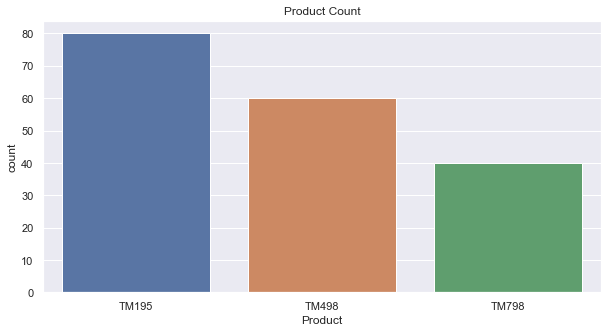

In [16]:
#Plot number of each product sales
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Product').set(title='Product Count');

#### Observation on "Product": 
1. TM195 is the most sold product (80 sales).
2. TM498 is second most sold product (60 sales).
3. TM798 is least sold product (40 sales).

### 2. Product vs Age characteristics



In [17]:
#Get statistical summary of "Age"
cardio_data_product['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,28.55,7.22,18.00,23.00,26.00,33.00,50.00
TM498,60.00,28.90,6.65,19.00,24.00,26.00,33.25,48.00
TM798,40.00,29.10,6.97,22.00,24.75,27.00,30.25,48.00


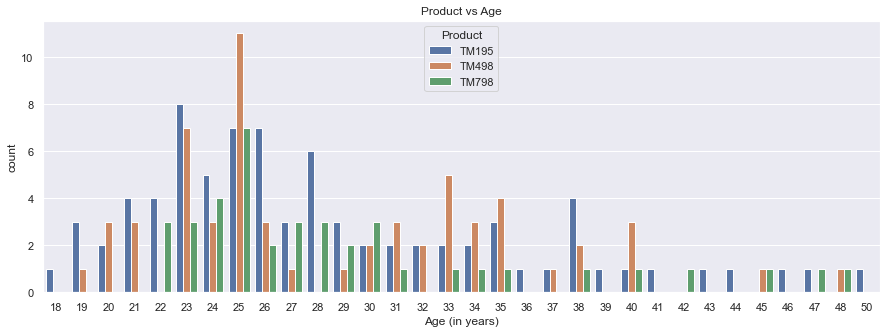

In [18]:
#Plot "Product" vs "Age" comparison
plt.figure(figsize=(15,5))

sns.countplot(data=cardio_data,x='Age',hue='Product').set(title='Product vs Age');
plt.xlabel("Age (in years)");

#### Observation of "Product" vs "Age":
1. Customers of across all ages use all three products. 
2. Most of the customers are of age 25. Among this, highest number of customers are for product TM498. 
3. From statistical summary, Mean and Median of product TM798 is more than other products. It shows customers with higher age prefers TM798.


### 3. Product vs Gender characteristics


In [19]:
#Get statistical summary of "Gender"
cardio_data_product['Gender'].describe()

,count,unique,top,freq
Product,,,,
TM195,80,2,Male,40
TM498,60,2,Male,31
TM798,40,2,Male,33


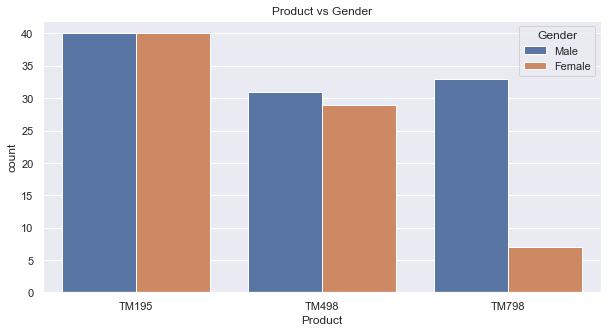

In [20]:
#Plot "Product" vs "Gender" comparison
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Product',hue='Gender').set(title='Product vs Gender');

#### Observation of "Product" vs "Gender":
1. Both males and females equally had purchased products TM195 and TM498. 
2. However, for product TM798, female customers are very less compared to male customers. **Recommendation : Target more female customers for product TM798**


### 4. Product vs Education characteristics



In [21]:
#Get statistical summary of "Education"
cardio_data_product['Education'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,15.04,1.22,12.00,14.00,16.00,16.00,18.00
TM498,60.00,15.12,1.22,12.00,14.00,16.00,16.00,18.00
TM798,40.00,17.32,1.64,14.00,16.00,18.00,18.00,21.00


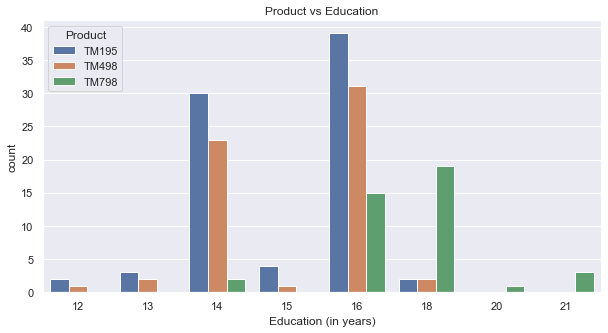

In [22]:
#Plot "Product" vs "Education" comparison
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Education',hue='Product').set(title='Product vs Education');
plt.xlabel("Education (in years)");

#### Observation of "Product" vs "Education":
1. Customers with average education tends to purchase products TM195 and TM498. 
2. Highly educated customers tends to purchase only the product TM798. Shown in green bar in above plot.


### 5. Product vs MaritalStatus characteristics



In [23]:
#Get statistical summary of "MaritalStatus"
cardio_data_product['MaritalStatus'].describe()

,count,unique,top,freq
Product,,,,
TM195,80,2,Partnered,48
TM498,60,2,Partnered,36
TM798,40,2,Partnered,23


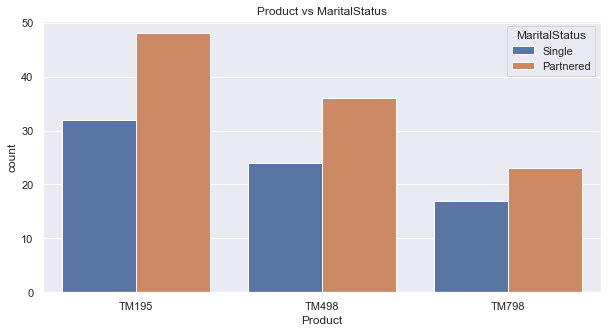

In [24]:
#Plot "Product" vs "MaritalStatus" comparison
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Product',hue='MaritalStatus').set(title='Product vs MaritalStatus');

#### Observation of "Product" vs "MaritalStatus":
1. Customers with marital status "Partnered" seems to be buying more products


### 6. Product vs Fitness characteristics



In [25]:
#Get statistical summary of "Fitness"
cardio_data_product['Fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,2.96,0.66,1.00,3.00,3.00,3.00,5.00
TM498,60.00,2.90,0.63,1.00,3.00,3.00,3.00,4.00
TM798,40.00,4.62,0.67,3.00,4.00,5.00,5.00,5.00


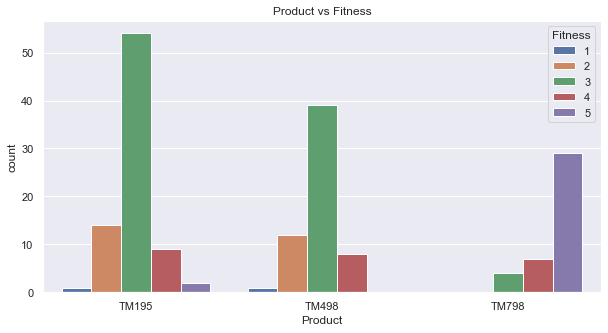

In [26]:
#Plot "Product" vs "Fitness" comparison
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Product',hue='Fitness').set(title='Product vs Fitness');

#### Observation of "Product" vs "Fitness":
1. Fitness level of customers buying product TM798 is high. Most of its customers have rated themselves 5 out of 5. See purple bar in above plot. 
2. The fitness level of customers using products TM195 and TM498 seems to be average (3 out of 5). Probably, they are trying to improve their fitness with these products. These products are more in demand.


### 7. Product vs Usage characteristics



In [27]:
#Get statistical summary of "Usage"
cardio_data_product['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,3.09,0.78,2.00,3.00,3.00,4.00,5.00
TM498,60.00,3.07,0.80,2.00,3.00,3.00,3.25,5.00
TM798,40.00,4.78,0.95,3.00,4.00,5.00,5.00,7.00


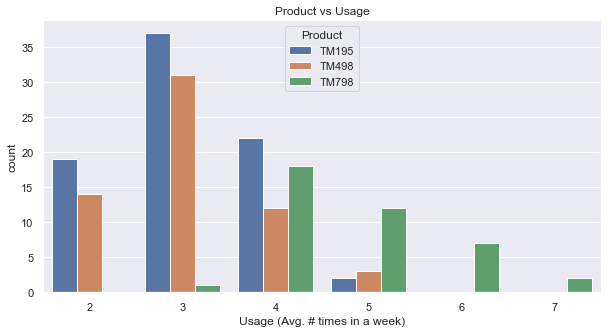

In [28]:
#Plot "Product" vs "Usage" comparison
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Usage',hue='Product').set(title='Product vs Usage');
plt.xlabel("Usage (Avg. # times in a week)");

#### Observation of "Product" vs "Fitness":
1. Customers who buy product TM798 seems to use it more compared to other two products. See green bar in above plot. 
2. Customers who buys products TM195 and TM498 doesnt plan to use these products as much as TM798. See blue and orange bars in above plot.


### 8. Product vs Income characteristics



In [29]:
#Get statistical summary of "Income"
cardio_data_product['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,"46,418.03","9,075.78","29,562.00","38,658.00","46,617.00","53,439.00","68,220.00"
TM498,60.00,"48,973.65","8,653.99","31,836.00","44,911.50","49,459.50","53,439.00","67,083.00"
TM798,40.00,"75,441.57","18,505.84","48,556.00","58,204.75","76,568.50","90,886.00","104,581.00"


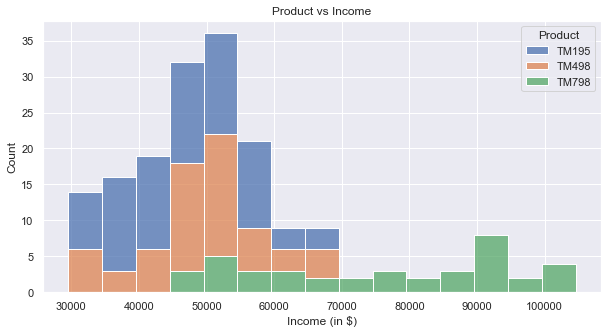

In [30]:
#Plot "Product" vs "Income" comparison
plt.figure(figsize=(10,5))
sns.histplot(data=cardio_data,x='Income',hue='Product',multiple='stack').set(title='Product vs Income');
plt.xlabel("Income (in $)");

#### Observation of "Product" vs "Income":
1. Customers purchasing product TM798 seems to have higher income. See green bar in above plot. 
2. Customers purchasing products TM195 and TM498 seems to have average income. See blue and orange bar in above plot.


### 9. Product vs Miles characteristics



In [31]:
#Get statistical summary of "Miles"
cardio_data_product['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,82.79,28.87,38.00,66.00,85.00,94.00,188.00
TM498,60.00,87.93,33.26,21.00,64.00,85.00,106.00,212.00
TM798,40.00,166.90,60.07,80.00,120.00,160.00,200.00,360.00


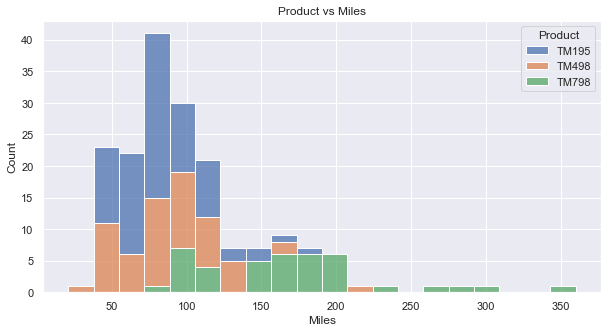

In [32]:
#Plot "Product" vs "Miles" comparison
plt.figure(figsize=(10,5))
sns.histplot(data=cardio_data,x='Miles',hue='Product',multiple='stack').set(title='Product vs Miles');

#### Observation of "Product" vs "Miles":
1. Customers using product TM798 expects to run more miles. See green bar in above plot. 
2. Customers using prodcts TM195 and TM498 plans to run few or average miles. See blue and orange bar in above plot.

---


### Univariate Data Analysis
Analysis of spread and distribution of every feature in the dataset.

In [33]:
#Get all column names
cardio_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### 1. Product - Univariate Data Analysis

Since data type is "Category", a qualitative analysis is best approach

In [34]:
#Get statistical summary of feature "Product"
cardio_data['Product'].describe()

count       180
unique        3
top       TM195
freq         80
Name: Product, dtype: object

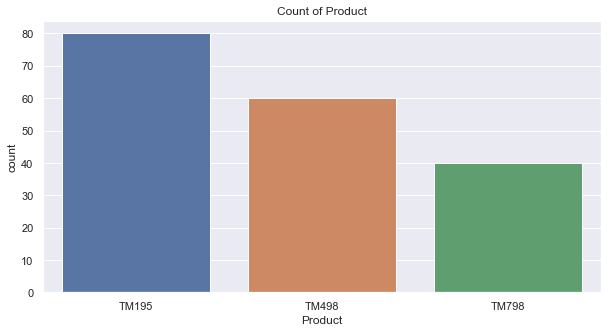

In [35]:
#Plot count of feature "Product"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Product']).set(title='Count of Product');

#### Observation : 
1. TM195 is the most sold product (80 sales).
2. TM498 is second most sold product (60 sales).
3. TM798 is least sold product (40 sales).

#### 2. Age - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [36]:
#Get statistical summary of feature "Age"
cardio_data['Age'].describe()

count   180.00
mean     28.79
std       6.94
min      18.00
25%      24.00
50%      26.00
75%      33.00
max      50.00
Name: Age, dtype: float64

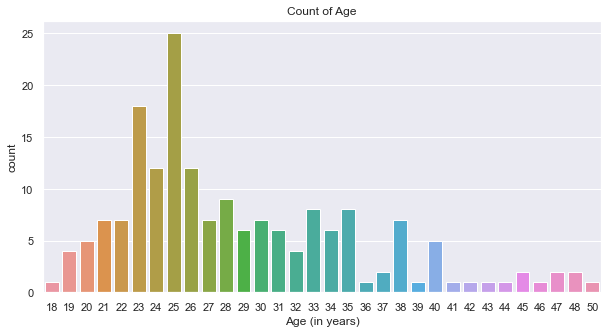

In [37]:
#Plot count of feature "Age"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Age']).set(title='Count of Age');
plt.xlabel("Age (in years)");

#### Observation for feature "Age": 
1. Age is right sqewed with outliers.
2. Median of age is 26, mode is 25 and mean is 28
3. Most of the customers has age 25

#### 3. Gender - Univariate Data Analysis

Since data type is "Category", a qualitative analysis is best approach

In [38]:
#Get statistical summary of feature "Gender"
cardio_data['Gender'].describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

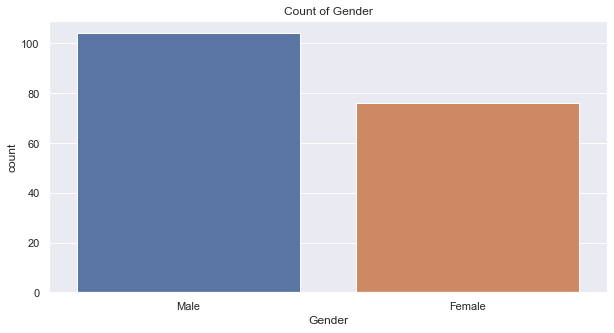

In [39]:
#Plot count of feature "Gender"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Gender']).set(title='Count of Gender');

#### Observation for feature "Gender": 
1. Most of the customers are male

#### 4. Education - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [40]:
#Get statistical summary of feature "Education"
cardio_data['Education'].describe()

count   180.00
mean     15.57
std       1.62
min      12.00
25%      14.00
50%      16.00
75%      16.00
max      21.00
Name: Education, dtype: float64

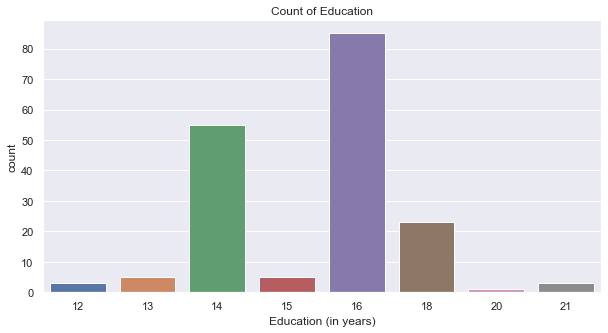

In [41]:
#Plot count of feature "Education"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Education']).set(title='Count of Education');
plt.xlabel("Education (in years)");

#### Observation for feature "Education": 
1. Most of the customers have education of 16 years

#### 5. Marital Status - Univariate Data Analysis

Since data type is "Category", a qualitative analysis is best approach

In [42]:
#Get statistical summary of feature "MaritalStatus"
cardio_data['MaritalStatus'].describe()

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

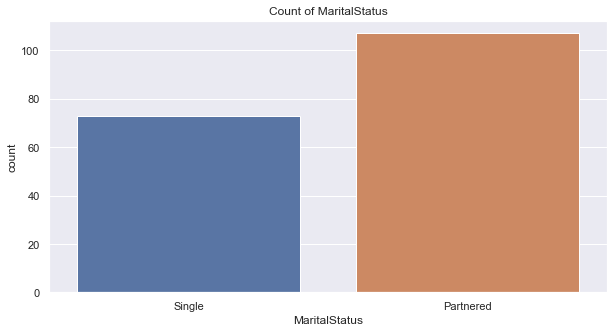

In [43]:
#Plot count of feature "MaritalStatus"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['MaritalStatus']).set(title='Count of MaritalStatus');

#### Observation for feature "MaritalStatus": 
1. Most of the customers are "Partnered".

#### 6. Usage - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [44]:
#Get statistical summary of feature "Usage"
cardio_data['Usage'].describe()

count   180.00
mean      3.46
std       1.08
min       2.00
25%       3.00
50%       3.00
75%       4.00
max       7.00
Name: Usage, dtype: float64

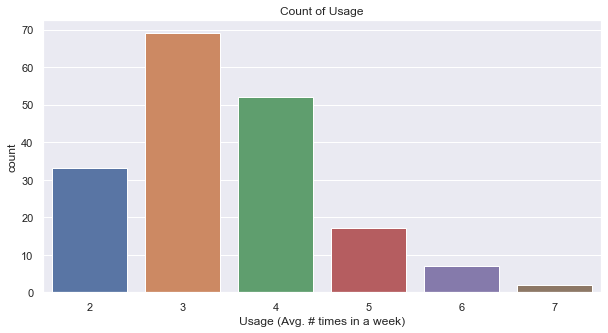

In [45]:
#Plot count of feature "Usage"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Usage']).set(title='Count of Usage');
plt.xlabel("Usage (Avg. # times in a week)");

#### Observation for feature "Usage": 
1. Most of the customers plans to use the threadmill average 3 times a week

#### 7. Fitness - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [46]:
#Get statistical summary of feature "Fitness"
cardio_data['Fitness'].describe()

count   180.00
mean      3.31
std       0.96
min       1.00
25%       3.00
50%       3.00
75%       4.00
max       5.00
Name: Fitness, dtype: float64

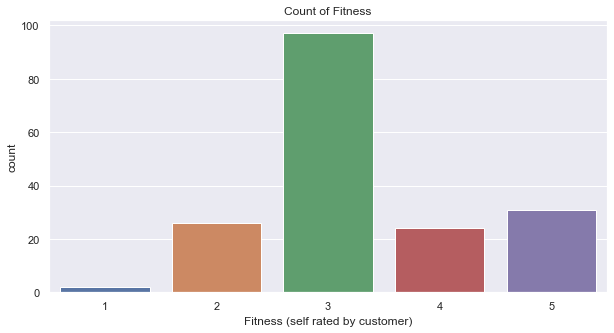

In [47]:
#Plot count of feature "Fitness"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['Fitness']).set(title='Count of Fitness');
plt.xlabel("Fitness (self rated by customer)");

#### Observation for feature "Fitness": 
1. Most of the customers had rated their fitness as 3

#### 8. Income - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [48]:
#Get statistical summary of feature "Income"
pd.options.display.float_format = '${:,.2f}'.format
cardio_data['Income'].describe()

count       $180.00
mean     $53,719.58
std      $16,506.68
min      $29,562.00
25%      $44,058.75
50%      $50,596.50
75%      $58,668.00
max     $104,581.00
Name: Income, dtype: float64

In [49]:
#Group Income for better visualization

#Create a function to dynamically group income based on income value
def IncomeGroup(Income):
    if (Income >=25001 and Income <=30000):
        return "25001-30000"
    elif (Income >=30001 and Income <=35000):
        return "30001-35000"
    elif (Income >=35001 and Income <=40000):
        return "35001-40000"
    elif (Income >=40001 and Income <=45000):
        return "40001-45000"
    elif (Income >=45001 and Income <=50000):
        return "45001-50000"
    elif (Income >=50001 and Income <=55000):
        return "50001-55000"
    elif (Income >=55001 and Income <=60000):
        return "55001-60000"
    elif (Income >=60001 and Income <=65000):
        return "60001-65000"
    elif (Income >=65001 and Income <=70000):
        return "65001-70000"
    elif (Income >=70001 and Income <=75000):
        return "70001-75000"
    elif (Income >=75001 and Income <=80000):
        return "75001-80000"
    elif (Income >=80001 and Income <=85000):
        return "80001-85000"
    elif (Income >=85001 and Income <=90000):
        return "85001-90000"
    elif (Income >=90001 and Income <=95000):
        return "90001-95000"
    elif (Income >=95001 and Income <=100000):
        return "95001-100000"
    elif (Income >=100001 and Income <=105000):
        return "100001-105000"
    
#Initialize new column 'IncomeGroup' with null values
cardio_data['IncomeGroup']=' '
#Loop through all rows in dataframe and assign income group for each income value
for x in cardio_data.index:
    cardio_data['IncomeGroup'][x] = IncomeGroup(cardio_data['Income'][x])

In [50]:
#Check values in new Income range column
cardio_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeGroup
88,TM498,23,Male,14,Partnered,3,3,38658,85,35001-40000
177,TM798,45,Male,16,Single,5,5,90886,160,90001-95000
61,TM195,34,Male,16,Single,4,5,51165,169,50001-55000
37,TM195,26,Male,16,Partnered,3,3,51165,85,50001-55000
85,TM498,21,Male,16,Partnered,2,2,34110,42,30001-35000


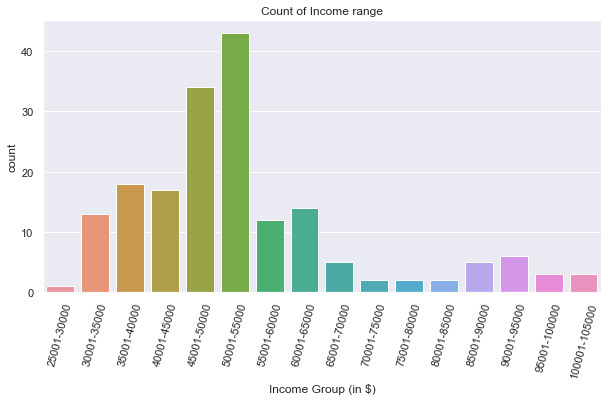

In [51]:
#Plot count of feature "Income"
plt.figure(figsize=(10,5))
sns.countplot(cardio_data['IncomeGroup'],order=["25001-30000","30001-35000","35001-40000","40001-45000","45001-50000","50001-55000","55001-60000","60001-65000","65001-70000","70001-75000","75001-80000","80001-85000","85001-90000","90001-95000","95001-100000","100001-105000"]).set(title='Count of Income range');
plt.xticks(rotation=75);
plt.xlabel("Income Group (in $)");

#### Observation for feature "Income": 
1. Income is right sqewed with outliers.
2. Median of Income is \\$50,596.5 mode is \\$45,480 and mean is \\$53,719.58
3. Most of the customers have income range of \\$50,001 to \\$55,000


#### 9. Miles - Univariate Data Analysis

Since data type is "Integer", a quantitative analysis is best approach


In [52]:
#Get statistical summary of feature "Miles"
pd.options.display.float_format = '{:,.2f}'.format
cardio_data['Miles'].describe()

count   180.00
mean    103.19
std      51.86
min      21.00
25%      66.00
50%      94.00
75%     114.75
max     360.00
Name: Miles, dtype: float64

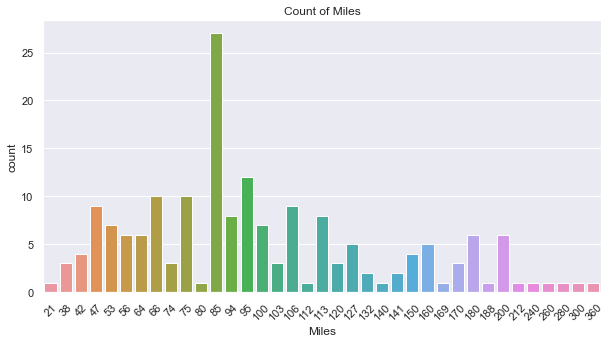

In [53]:
#Plot count of feature "Miles"
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_data,x='Miles').set(title='Count of Miles');
plt.xticks(rotation=45);

#### Observation for feature "Miles": 
1. Miles is right sqewed with outliers.
2. Most of the customers expect to run 85 miles
---

### Multivariate Data Analysis
Analysis of spread and distribution between every feature in the dataset.

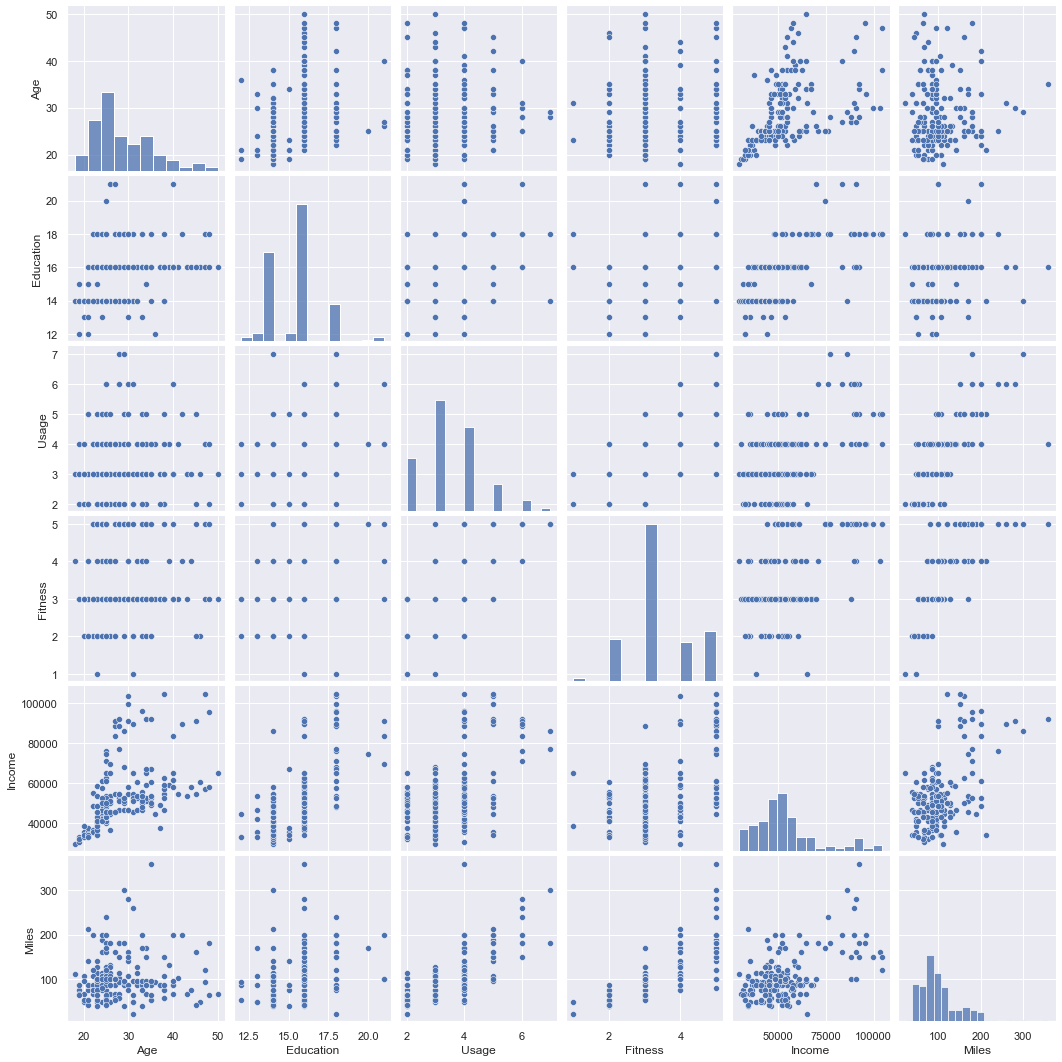

In [54]:
#Compare each numerical feature against each other
sns.pairplot(cardio_data);

In [55]:
#Get correlation between each numerical feature
cardio_data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


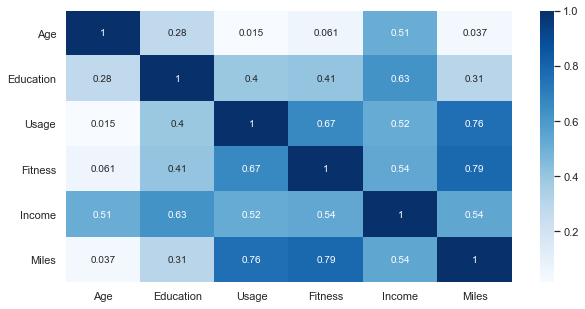

In [56]:
#Plot heatmap of all numerical features to visualize their correlation
plt.figure(figsize=(10,5))
sns.heatmap(cardio_data.corr(),annot=True,cmap="Blues");

#### Observation on numerical features:
1. There are no negative correlations
2. As "Age" increases, their "Income" also increases. Looks like customers earn more as they age.
3. As "Education" increases, their "Income" also increases. Looks like customers with higher education earn more income
4. As "Usage" increases, "Fitness" and "Miles" increases. Looks like customers who plan to use the machine more, also plan to run more miles. Their current fitness ratings are also good. Which shows they exercise consistently to improve their fitness.
5. As "Income" increases, "Usage","Fitness","Miles" increases. Looks like high earning customers tend to excercise more and use products more.
6. As "Miles" increases, "Usage" and "Fitness" also increases. Looks like running more miles increase product usage and customer's fitness.


#### 1. Age vs Income vs Product Correlation


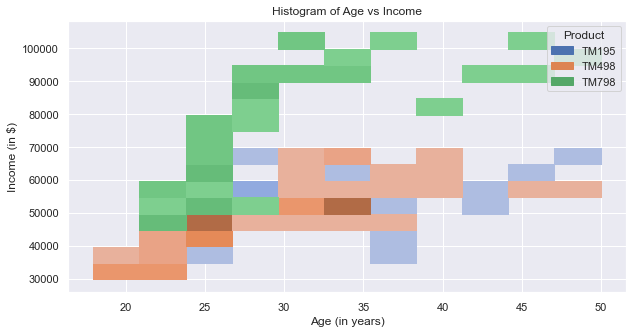

In [57]:
#Plot "Age" vs "Income" vs "Product" correlation
plt.figure(figsize=(10,5))
sns.histplot(data=cardio_data,x='Age',y='Income',hue='Product').set(title='Histogram of Age vs Income');
plt.xlabel("Age (in years)");
plt.ylabel("Income (in $)");

#### Observation : 
1. "Income" increases as "Age" increases. 
2. Product TM798 seems to be favorite of high income customers
3. However, most of customers are aged around 25


#### 2. Education vs Income vs Product Correlation



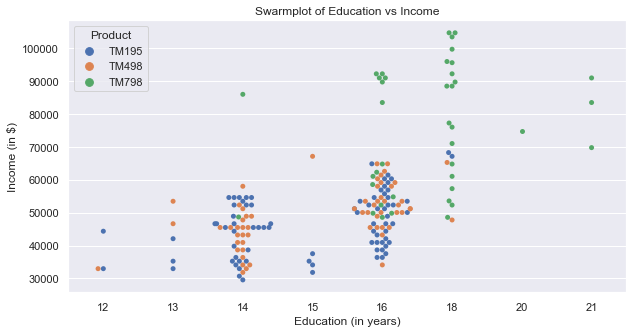

In [58]:
#Plot "Education" vs "Income" vs "Product" correlation
plt.figure(figsize=(10,5))
sns.swarmplot(data=cardio_data,x='Education',y='Income',hue='Product').set(title='Swarmplot of Education vs Income');
plt.xlabel("Education (in years)");
plt.ylabel("Income (in $)");

#### Observation : 
1. "Income" increases as "Education" increases. 
2. Highly educated customers seems to be purchasing TM498
3. However, most of the customers are educated at 14 years and 16 years. 


#### 3. Fitness vs Miles vs Product Correlation



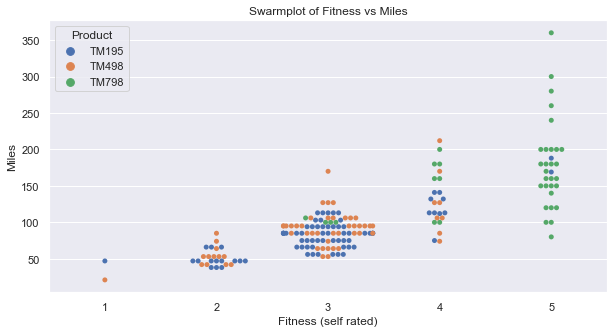

In [59]:
#Plot "Fitness" vs "Miles" vs "Product" correlation
plt.figure(figsize=(10,5))
sns.swarmplot(data=cardio_data,x='Fitness',y='Miles',hue='Product').set(title='Swarmplot of Fitness vs Miles');
plt.xlabel("Fitness (self rated)");

#### Observation : 
1. Customers who had rated high "Fitness" plans to run more "Miles" and purchases product TM498.
2. However, most of customers had rated fitness as 3 and prefers TM195 and TM498.


#### 4. Usage vs Miles vs Fitness Correlation



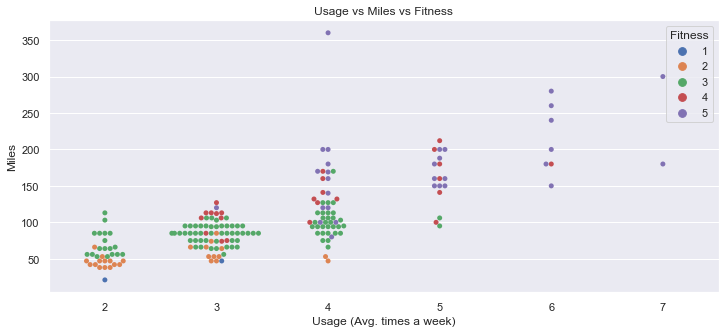

In [60]:
#Plot "Usage" vs "Miles" vs "Fitness" correlation
plt.figure(figsize=(12,5))
sns.swarmplot(data=cardio_data,x='Usage',y='Miles',hue='Fitness').set(title='Usage vs Miles vs Fitness');
plt.xlabel("Usage (Avg. times a week)");

#### Observation : 
1. There is a positive correlation between three features "Usage", "Miles" and "Fitness". See purple dots for "Fitness" under "Usage" 5,6 and 7 in above plot. Customers who plans to use threadmill more, also plans to run more miles and their self rated fitness is also high.


#### 5. Age vs Income vs Education Correlation



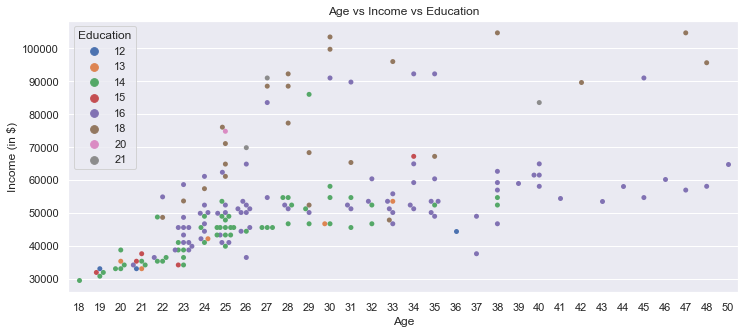

In [61]:
#Plot "Age" vs "Income" vs "Education" correlation
plt.figure(figsize=(12,5))
sns.swarmplot(data=cardio_data,x='Age',y='Income',hue='Education').set(title='Age vs Income vs Education');
plt.ylabel("Income (in $)");

#### Observation : 
1. There is a positive correlation between three features "Age", "Income" and "Education". See purple dots for "Education" in above plot.


#### 6. Gender vs Fitness  Correlation



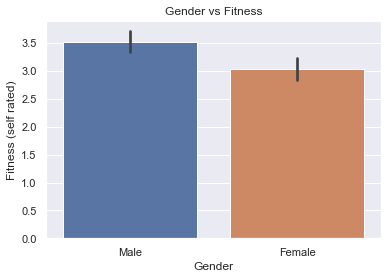

In [62]:
#Plot "Gender" vs "Fitness" relation
sns.barplot(data=cardio_data,x='Gender',y='Fitness').set(title='Gender vs Fitness');
plt.ylabel("Fitness (self rated)");


#### Observation : 
1. Male customers had rated more fitness compared to female customers.


#### 7. Gender vs Fitness vs Product Correlation



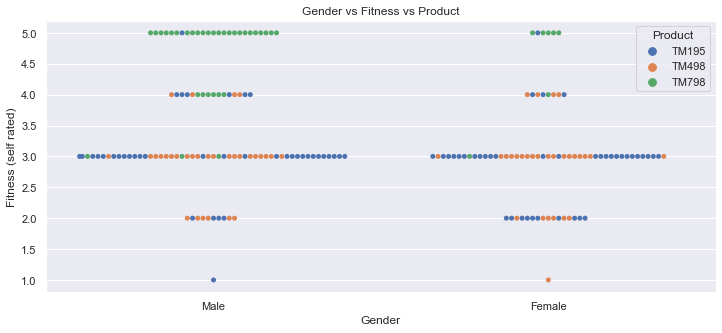

In [63]:
#Plot "Gender" vs "Fitness" vs "Product" correlation
plt.figure(figsize=(12,5))
sns.swarmplot(data=cardio_data,x='Gender',y='Fitness',hue='Product').set(title='Gender vs Fitness vs Product');
plt.ylabel("Fitness (self rated)");

#### Observation : 
1. Male customers had rated themselves more fitness and tend to purchase product TM798. See green dots in above plot.  **Recommendation : Market product TM798 to female customers.**

---
### Conclusion and Recommendations
--Generate a set of insights and recommendations that will help the company in targeting new customers

#### Insights:

1. TM195 is the most sold product. TM498 is second most sold product. TM798 is least sold product.
2. Most of customers are of age around 25 years.
3. Most of customers are male. TM798 has least number of female customers compared to other products.
4. Most of customers are educated with 16 years. Customers with higher education tends to purchase product TM798.
5. Most of the customers are in marital status “Partnered”.
6. Most of the customers plan to use products on an average of 3 times a week. High usage is found for product TM798.
7. Most of the customers have rated their fitness as 3 on a scale of 1 to 5. High fitness rating is found for product TM798.
8. Most of the customers have income range between \\$50,001 - \\$55,000. Customers with higher income tends to purchase product TM798.
9. Most of the customers plan to run 85 miles a week. Higher miles are found for product TM798.
10. Fitness level of customers using product TM798 is high compared to other products.
11. Customers who brought TM798 plans to use the product more than other products.
12. Customers with high income tends to buy product TM798. Customers with low income tends to buy products TM195 and TM498.
13. Customers using product TM798 plans to run more miles compared to other customers.
14. There is a positive correlation between "Age","Education" and "Income".
15. There is a positive correlation between "Usage", "Miles" and "Income".
16. Male customers have more fitness compared to female customers.


#### Recommendations:

1. **Market product TM498 for more sales:** Customers who purchased the product TM798 had rated high fitness rating and plan to use more. Customers using this product tends to run long miles. However, this product is least sold.  So need to market product TM798 more to attract more customers by showing its benefits. Also, Market TM798 among high income customers.
2. **Market product TM498 for more female customers:** Female customers are very less for product TM798 and their fitness level is also less. Market product TM798 to more female customers to improve their fitness level.
3. **Highlight products TM195 and TM498 which are most popular products:** These products are very popular among average and low income customers. Also, they are popular among customers who plan to use threadmill on average 3 days a week. Also, they are popular among customers whose self rated fitness is 3 out of 5.

---